<a href="https://colab.research.google.com/github/farhanns481/exit-exam/blob/main/exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

In [17]:
df = pd.read_excel("/content/partpdf_1763620928546_netflix_titles.xlsx")

In [5]:
df

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0
...,...,...,...,...,...,...,...,...,...
6231,NaN,13,TV Show,Red vs. Blue,NaN,2015.0,NR,"This parody of first-person shooter games, mil...",80000063.0
6232,NaN,4,TV Show,Maron,NaN,2016.0,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564.0
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0


In [6]:
df.shape

(6236, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4267 non-null   object 
 1   duration_seasons  1971 non-null   object 
 2   type              6235 non-null   object 
 3   title             6235 non-null   object 
 4   date_added        6223 non-null   object 
 5   release_year      6234 non-null   float64
 6   rating            6223 non-null   object 
 7   description       6233 non-null   object 
 8   show_id           6232 non-null   float64
dtypes: float64(2), object(7)
memory usage: 438.6+ KB


In [8]:
df.describe()

,release_year,show_id
count,6.234000e+03,6.232000e+03
mean,1.486502e+04,7.670257e+07
std,1.014711e+06,1.094455e+07
min,1.925000e+03,2.477470e+05
25%,2.013000e+03,8.003569e+07
50%,2.016000e+03,8.016337e+07
75%,2.018000e+03,8.024491e+07
max,8.011919e+07,8.123573e+07


In [9]:
df.isna().sum()

,0
duration_minutes,1969
duration_seasons,4265
type,1
title,1
date_added,13
release_year,2
rating,13
description,3
show_id,4


In [34]:
df['release_year'].skew()

np.float64(78.95568376376247)

<Axes: >

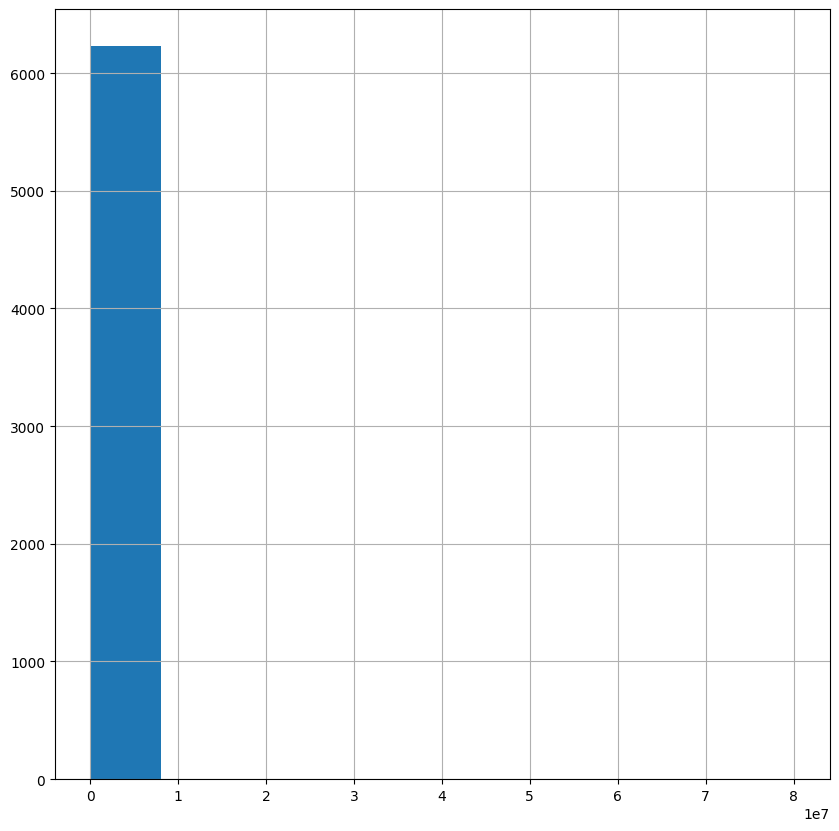

In [35]:
df['release_year'].hist(figsize=(10,10))

<Axes: >

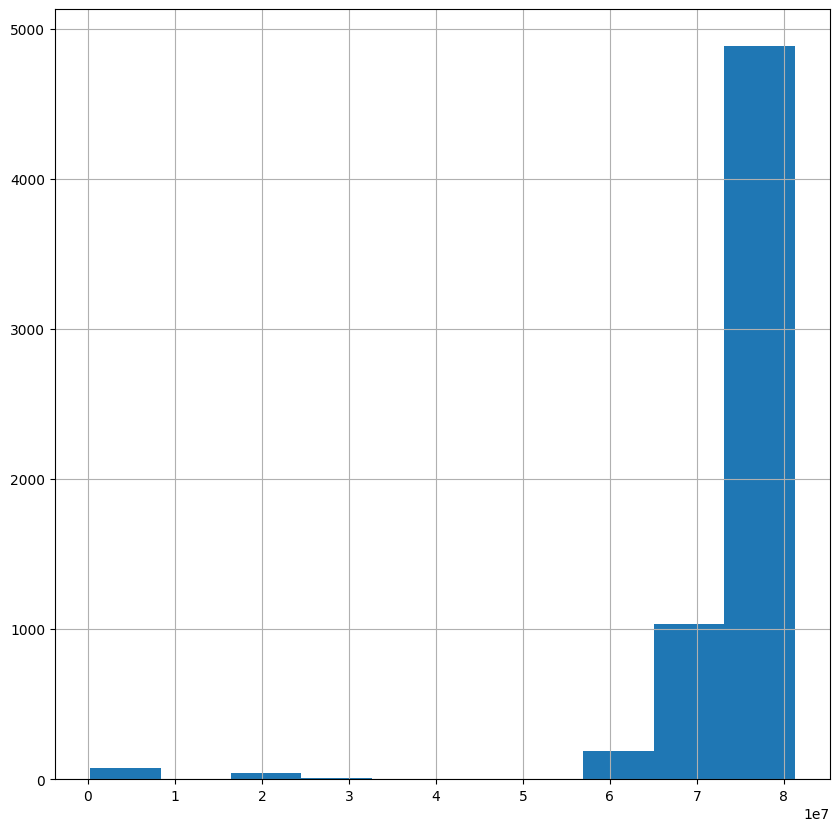

In [36]:
df['show_id'].hist(figsize=(10,10))

In [37]:
df['show_id'].skew()

np.float64(-5.150019761098412)

In [38]:
df['release_year'].fillna(df['release_year'].median,inplace=True)

/tmp/ipython-input-3974039535.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0       2019.0
1       2016.0
2       2013.0
3       2016.0
4       2017.0
         ...  
6231    2015.0
6232    2016.0
6233    2016.0
6234    2013.0
6235    2003.0
Name: release_year, Length: 6236, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['release_year'].fillna(df['release_year'].median,inplace=True)


In [39]:
df.isna().sum()

,0
duration_minutes,1969
duration_seasons,4265
type,1
title,1
date_added,13
release_year,0
rating,13
description,3
show_id,4


In [40]:
df['title'].fillna(df['title'].mode,inplace=True)

In [41]:
df.isna().sum()

,0
duration_minutes,1969
duration_seasons,4265
type,1
title,0
date_added,13
release_year,0
rating,13
description,3
show_id,4


In [49]:
df['description'].fillna(df['description'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['title'].fillna(df['title'].mode()[0],inplace=True)
df['type'].fillna(df['type'].mode()[0],inplace=True)
df['duration_seasons'].fillna(df['duration_seasons'].mode()[0],inplace=True)
df['duration_minutes'].fillna(df['duration_minutes'].mode()[0],inplace=True)

/tmp/ipython-input-3527642406.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_seasons'].fillna(df['duration_seasons'].mode()[0],inplace=True)
/tmp/ipython-input-3527642406.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4267 non-null   object 
 1   duration_seasons  1971 non-null   object 
 2   type              6235 non-null   object 
 3   title             6236 non-null   object 
 4   date_added        6223 non-null   object 
 5   release_year      6236 non-null   object 
 6   rating            6223 non-null   object 
 7   description       6233 non-null   object 
 8   show_id           6232 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.6+ KB


In [55]:
file_path = "/content/partpdf_1763620928546_netflix_titles.xlsx"
df_main = pd.read_excel(file_path, sheet_name="netflix_titles")
df_dir = pd.read_excel(file_path, sheet_name="netflix_titles_directors")
df_cty = pd.read_excel(file_path, sheet_name="netflix_titles_countries")
df_cast = pd.read_excel(file_path, sheet_name="netflix_titles_cast")
df_cat = pd.read_excel(file_path, sheet_name="netflix_titles_category")


df_merged = (
    df_main
    .merge(df_dir, on="show_id", how="left")
    .merge(df_cty, on="show_id", how="left")
    .merge(df_cast, on="show_id", how="left")
    .merge(df_cat, on="show_id", how="left")
)


df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139946 entries, 0 to 139945
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_minutes  98561 non-null   object 
 1   duration_seasons  41387 non-null   object 
 2   type              139945 non-null  object 
 3   title             139945 non-null  object 
 4   date_added        139785 non-null  object 
 5   release_year      139944 non-null  float64
 6   rating            139870 non-null  object 
 7   description       139943 non-null  object 
 8   show_id           139942 non-null  float64
 9   director          101031 non-null  object 
 10  country           134152 non-null  object 
 11  cast              138456 non-null  object 
 12  listed_in         139942 non-null  object 
dtypes: float64(2), object(11)
memory usage: 13.9+ MB


In [45]:
df.isna().sum()

,0
duration_minutes,1969
duration_seasons,4265
type,0
title,0
date_added,0
release_year,0
rating,0
description,0
show_id,4


In [66]:
df_merged['listed_in'] = df_merged['listed_in'].fillna('').astype(str).str.split(',')
df_merged['listed_in'] = df_merged['listed_in'].apply(
    lambda x: [item.strip() for item in x if isinstance(item, str) and item.strip()]
    if isinstance(x, list)
    else []
)
df_exploded = df_merged.explode('listed_in')

df_exploded[['show_id', 'title', 'listed_in']].head()

,show_id,title,listed_in
0,81145628.0,Norm of the North: King Sized Adventure,[]
1,81145628.0,Norm of the North: King Sized Adventure,[]
2,81145628.0,Norm of the North: King Sized Adventure,[]
3,81145628.0,Norm of the North: King Sized Adventure,[]
4,81145628.0,Norm of the North: King Sized Adventure,[]


In [50]:
df.isna().sum()

,0
duration_minutes,0
duration_seasons,0
type,0
title,0
date_added,0
release_year,0
rating,0
description,0
show_id,4


In [73]:
import pandas as pd

df = pd.read_excel("/content/partpdf_1763620928546_netflix_titles.xlsx")

df[['title']].head()

,title
0,Norm of the North: King Sized Adventure
1,Jandino: Whatever it Takes
2,Transformers Prime
3,Transformers: Robots in Disguise
4,#realityhigh


In [78]:
df_merged['cast'] = df_merged['cast'].fillna('')

df_merged['cast_split'] = df_merged['cast'].str.split(', ')

df_cast_exploded = df_merged.explode('cast_split')

df_cast_exploded = df_cast_exploded.rename(columns={'cast_split': 'actor'})

df_cast_exploded.head(10)

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_added,actor,categories
0,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,[[]],2019.0,Alan Marriott,NaN
1,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,[[]],2019.0,Alan Marriott,NaN
2,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,[[]],2019.0,Jennifer Cameron,NaN
3,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,[[]],2019.0,Jennifer Cameron,NaN
4,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,[[]],2019.0,Lee Tockar,NaN
5,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,[[]],2019.0,Lee Tockar,NaN
6,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jonathan Holmes,[[]],2019.0,Jonathan Holmes,NaN
7,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jonathan Holmes,[[]],2019.0,Jonathan Holmes,NaN
8,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Michael Dobson,[[]],2019.0,Michael Dobson,NaN
9,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Michael Dobson,[[]],2019.0,Michael Dobson,NaN


In [79]:
df_merged['listed_in'] = df_merged['listed_in'].fillna('')

df_merged['categories'] = df_merged['listed_in'].str.split(', ')

df_category_exploded = df_merged.explode('categories')

df_category_exploded.head(10)

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_added,cast_split,categories
0,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,[[]],2019.0,[Alan Marriott],NaN
1,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,[[]],2019.0,[Alan Marriott],NaN
2,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,[[]],2019.0,[Jennifer Cameron],NaN
3,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,[[]],2019.0,[Jennifer Cameron],NaN
4,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,[[]],2019.0,[Lee Tockar],NaN
5,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,[[]],2019.0,[Lee Tockar],NaN
6,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jonathan Holmes,[[]],2019.0,[Jonathan Holmes],NaN
7,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jonathan Holmes,[[]],2019.0,[Jonathan Holmes],NaN
8,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Michael Dobson,[[]],2019.0,[Michael Dobson],NaN
9,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Michael Dobson,[[]],2019.0,[Michael Dobson],NaN


In [58]:
df_merged['director'] = df_merged['director'].fillna('Unknown')
df_merged['country'] = df_merged['country'].fillna('Unknown')
df_merged['cast'] = df_merged['cast'].fillna('Unknown')


df_merged['rating'] = df_merged['rating'].fillna('Not Rated')


df_merged['duration_minutes'] = df_merged['duration_minutes'].fillna('0')
df_merged['duration_seasons'] = df_merged['duration_seasons'].fillna('0')


df_merged['date_added'] = pd.to_datetime(df_merged['date_added'], errors='coerce')


df_merged['year_added'] = df_merged['date_added'].dt.year

df_merged[['date_added', 'year_added', 'country']].head()

,date_added,year_added,country
0,2019-09-09,2019.0,United States
1,2019-09-09,2019.0,United States
2,2019-09-09,2019.0,United States
3,2019-09-09,2019.0,United States
4,2019-09-09,2019.0,United States


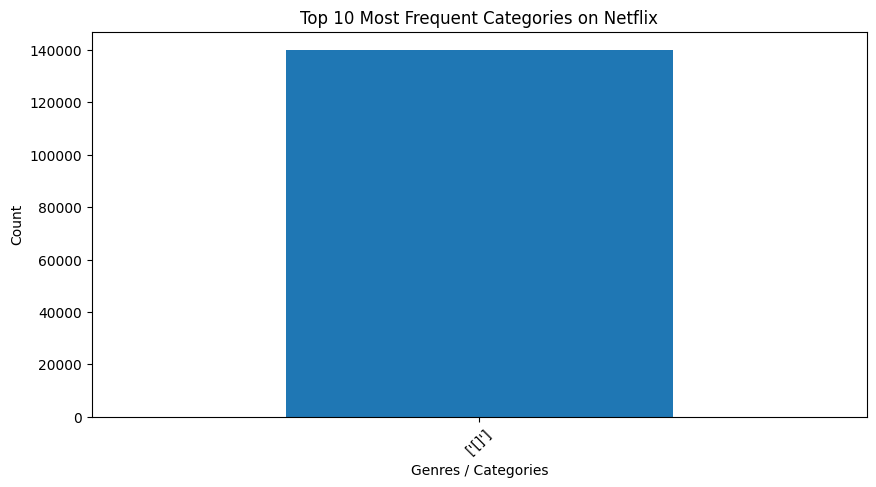

In [83]:
# Re-process 'listed_in' to ensure it's a Series of cleaned individual strings
df_exploded_categories = (
    df_merged['listed_in']
    .astype(str)  # Ensure all values are strings
    .apply(lambda x: x.split(',') if x != 'nan' else [])  # Split strings into lists, handle 'nan'
    .apply(lambda lst: [item.strip() for item in lst if item.strip()])  # Clean and filter empty strings from lists
    .explode()  # Flatten the list of strings into individual rows
    .rename('categories')  # Rename the resulting Series to 'categories'
)

# Filter out any remaining empty strings if present after explode
df_exploded_categories = df_exploded_categories[df_exploded_categories != '']

# Now get the value counts of the categories.
category_counts = df_exploded_categories.value_counts().head(10)

plt.figure(figsize=(10,5))
category_counts.plot(kind='bar')
plt.title("Top 10 Most Frequent Categories on Netflix")
plt.xlabel("Genres / Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle
import numpy as np # Import numpy for np.nan

# Load dataset
df = pd.read_excel("/content/partpdf_1763620928546_netflix_titles.xlsx")

# -------------------------------
# BASIC PREPROCESSING
# -------------------------------

# Handle duration columns first: convert to numeric, then fill NaNs
for col in ['duration_minutes', 'duration_seasons']:
    # Convert to numeric, coerce errors will turn non-numeric into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Fill remaining NaNs with the median of the column
    df[col] = df[col].fillna(df[col].median())

# Fill missing values for other columns
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else: # numerical columns (including duration_minutes, duration_seasons, release_year, show_id now)
        df[col] = df[col].fillna(df[col].median())

# Encode categorical columns (those remaining as 'object' dtype)
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    # Explicitly convert to string to handle potential mixed types within 'object' columns
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

# -------------------------------
# SPLIT DATA
# -------------------------------
# Using 'type' as the target variable for demonstration
X = df.drop("type", axis=1)
y = df["type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# TRAIN MODEL
# -------------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# -------------------------------
# EVALUATE
# -------------------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# -------------------------------
# SAVE MODEL AS PICKLE
# -------------------------------
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as model.pkl")

Accuracy: 0.6907051282051282
Model saved as model.pkl
